# Task 4: Hand in Exercise ANN Modelling and Model Performance Evaluation

    Based on this lecture, you are going to do Task 4: ANN modeling

    
   Your task #1: Synthetic Data based modeling to learn step by step how the ANN modeling and evaluation works
       
       a) Use balisticwithout wind data. The Projectile motion time of flight and range data has been generated by random 
       Inital velocity and intial angle. Therfore, using Input features (V0 and ang), and Target (Time, or R) peform ANN 
        modelling and Check if ANN perfectly discovred the physics (i.e, using 70% data for training, check if the model 
        predict the test 30% perfectly). In short, run two modeling 
            I ) Input features (V0 and ang), and Target (Time) 
           II ) Input features (V0 and ang), and Target (R) 
   
   
   Your task #2: Your Project task #4: Using Cleaned dataset: to be handed in: 
          
       b) Use Cleaned project file, your task is to model Vp as a target, and the rest logs as input feature
           
           Input features a combination of (DEN, NEU, Vs), and Target (Vp) 
           
           Which combination of Input features provided good model with the Target (Vp)? 
   
                  
 
 How the ANN modeling and Performance analysis work? 
       
       We will learn during lecture hr. The note is uploaded as lecture #4
       
       When you do your project works, feel free to contact me at my office or in the lab
       

In [3]:
###==========================================================================================================================###
#Please take time to read the following guide written in this box. 
#Here, you will get the brief information about the modelling
#The ANN modelling will be performed with keras/Python built in library
#if incase you dont have the tensor flow, you need to install by the following options

# Installing required libraries
#!pip install tensorflow
#!pip install keras

###==========================================================================================================================###
# Here we will perfrom ANN after standarizing the dataset
#How do you standardize a data set in Python?
#Ways to Standardize Data in Python
     #Using preprocessing. scale() function. 
     #Using StandardScaler() function. 
     #Python sklearn library offers us with StandardScaler() function to perform standardization on the dataset. 
# It is reported that Standardization of the dataset
    #Data scaling is a recommended pre-processing step when working with deep learning neural networks.
    #Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
    #How to apply standardization and normalization to improve the performance of a Multilayer Perceptron model on 
    #a regression predictive modeling problem.
###==========================================================================================================================###
    
# Read this and the ANN modelling code is summariazed as the following 

# Step 1 Data pre-processing
    # File loading 
    # Target and predictor variables separation 
    # Standardization via python StandardScaler() function. 
    # Splitting data into traning and test set 
    
# Step 2 ANN modelling  
 #2-1 CREATING ANN MODEL 
  #2.1.1 Defining the Input layer and FIRST hidden layer!
  #2-1.2 Defining the Second layer of the model
  #2-1.3 The output neuron is a single fully connected node 
# 2-2 COMPILING THE MODEL 
# 2-3 FITTING THE ANN ANN to the Training set

# Step 3 Model prediction
   #Perform inverse transformation
   # Pediction and compare with measured data

# Step 4 Model performance analysis 
  # Here statistical analysis will be performed to evaluate the model accuracy of the prediction
###==========================================================================================================================###



# Install Tensorflow and keras

In [40]:
# Installing required libraries
!pip install tensorflow
!pip install keras


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Import data

In [41]:
# Reading the cleaned numeric logdata
import pandas as pd
import numpy as np

CleanedData =pd.read_excel('CleanOutlier1.xlsx')
CleanedData.head()


,Vs,DEN,NEU,Vp
0,1.676857,2.3767,0.2759,3.045533
1,1.677172,2.2101,0.2524,2.974779
2,1.676252,2.1419,0.2591,2.881411
3,1.677030,2.1660,0.2589,2.930981
4,1.684534,2.1193,0.2596,2.910094


# Standardize and Split (Training/Test)

In [51]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [80]:
# Let us do standarziation and data splitting......
def standardization_and_data_splitting(X, y):

    ### Sandardization of data ###
    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Storing the fit object for later reference
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)

    # Generating the standardized values of X and y
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)

    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=False)

    # Quick sanity check with the shapes of Training and testing datasets
    print(X_train.shape)
    print(X_train.shape[0])
    print(X_train.shape[1])
    print(type(X_train))
    print(X_train.size)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    return X_train, X_test, y_train, y_test

    #CleanedData[TargetVariable].values
    #CleanedData[TargetVariable].values
    


In [87]:
# Separate Target Variable and Predictor Variables


# Task 2: Your project Later you will use your project cleaned here (Any combinaion of input features)
TargetVariable=['Vp']
Predictors=['Vs', 'DEN', 'NEU']
# Predictors=['Vs', 'DEN']
X=CleanedData[Predictors].values
y=CleanedData[TargetVariable].values

X_train, X_test, y_train, y_test = standardization_and_data_splitting(X, y)


(741, 3)
741
3
<class 'numpy.ndarray'>
2223
(741, 1)
(318, 3)
(318, 1)


In [49]:
# Command that fixes bug that arises with wrong version of NumPy
# pip install numpy==1.22.4 (do this in terminal before opening this file)

import numpy as np
 
print("My numpy version is: ", np.__version__)


My numpy version is:  1.22.4


# ANN Modeling Step by Step

In [88]:
def ANN_modeling(X_train, y_train):

    # ============Create ANN model========================
    model = Sequential()


    # Defining the Input layer and FIRST hidden layer, both are same! Dense allow nodes to be fully connected
    model.add(Dense(
        units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))


    # Defining the Second layer of the model
    # after the first layer we don't have to specify input_dim as keras configure it automatically

    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

    #======================# The output neuron is a single fully connected node =======================
    # Since we will be predicting a single number
    model.add(Dense(1, kernel_initializer='normal'))



    # ==================Compiling the model======================================
    model.compile(loss='mean_squared_error', optimizer='RMSprop')#adam kan også brukes

    # =================Fitting the ANN to the Training set======================

    model.fit(X_train, y_train ,batch_size = 20, epochs = 1500, verbose=0) # vebrose =1, allows to visualise the iteration. =0, not
    

    #==================For Logging modeling loss history ========================

    history = model.fit(X_train, y_train ,batch_size = 20, epochs = 1500, verbose=0) #verbose=1 før
    # batch_size (number_of_lines_in_excel_sheet / 20)
    # So that means 300/20 = 15 iterations to achieve 1 epoch
    # epochs = 1500 means, do this iteration 1500 times
    # In the log underneath, notice that the loss is reduced for every epoch

    
    print()
    print()
    print("-----------------------------")
    print("model.summary()")
    print("-----------------------------")
    model.summary()
    
    print()
    print()
    print("-----------------------------")
    print("print(model)")
    print("-----------------------------")
    print(model)
    


In [89]:
ANN_modeling(X_train, y_train)




-----------------------------
model.summary()
-----------------------------
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5)                 20        
                                                                 
 dense_43 (Dense)            (None, 5)                 30        
                                                                 
 dense_44 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


-----------------------------
print(model)
-----------------------------


## Model prediction

In [25]:

# Fitting the ANN to the Training set
#model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
#model.fit(X_train, y_train ,batch_size = 20, epochs = 10, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

#y_test_orig=y_test

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

#Test_Data=X_test


TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Range']=y_test_orig
TestingData['Predicted Range']=Predictions
TestingData.head(20)

3/3 [==============================] - 0s 2ms/step


,V0,ang,Range,Predicted Range
0,75.27,53.6,188.92,191.277237
1,86.19,67.1,154.61,157.113495
2,65.46,44.0,182.19,179.412262
3,73.56,41.6,205.15,202.130966
4,88.63,37.1,242.93,241.349045
5,62.89,57.9,150.14,153.095673
6,98.51,31.6,262.77,263.802612
7,70.02,36.5,196.99,196.018234
8,77.80,45.6,211.12,210.761017
9,73.04,37.9,205.17,203.064438


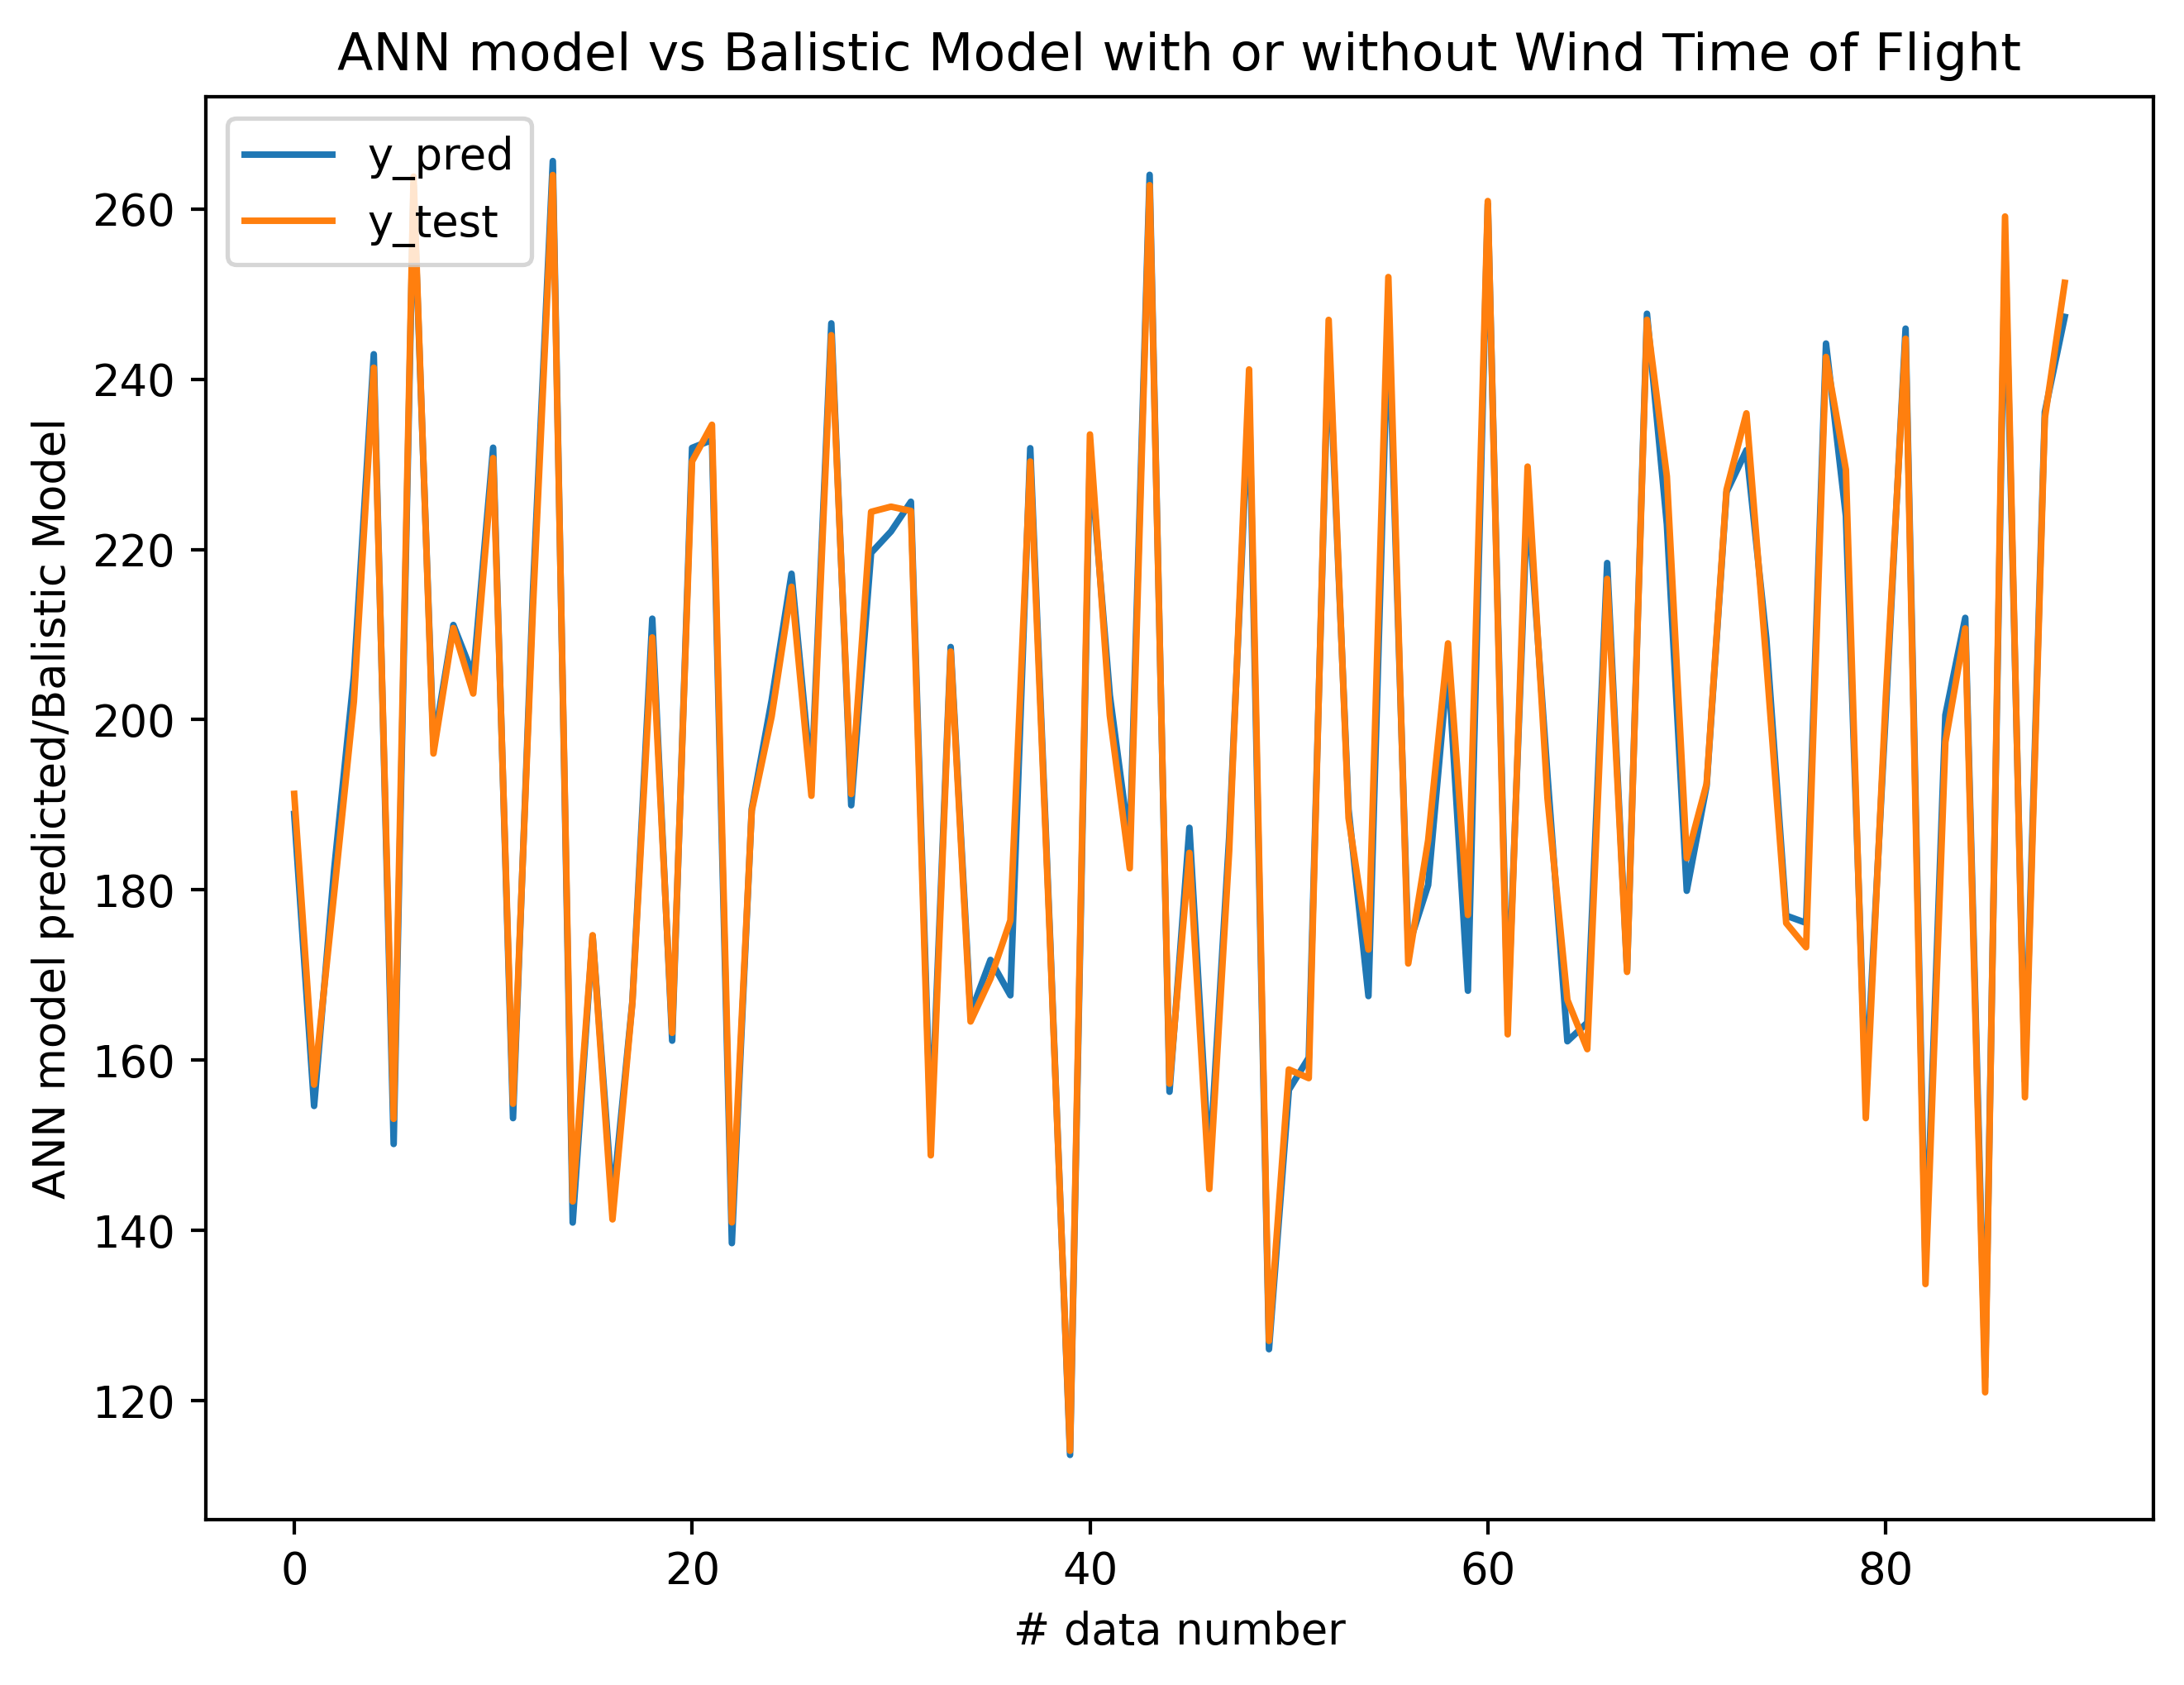

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

plt.plot(y_test_orig)
plt.plot(Predictions)


#plt.title('ANN model vs Balistic Model with Wind Horizontal Range')
plt.title('ANN model vs Balistic Model with or without Wind Time of Flight')
plt.ylabel('ANN model predicted/Balistic Model')
plt.xlabel('# data number')
plt.legend(['y_pred', 'y_test'], loc='upper left')
plt.show()



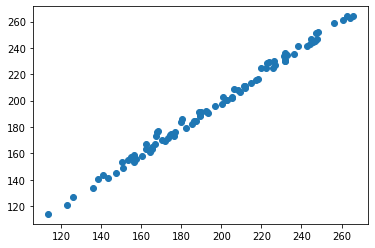

In [27]:
plt.scatter(y_test_orig, Predictions)

# Model accuracy analysis

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_no= mean_squared_error(y_test,model.predict(X_test))
r2_no= r2_score(y_test,model.predict(X_test))

3/3 [==============================] - 0s 1ms/step


In [29]:
print('Mean Square Error       :',mse_no)
print('R2 Score                :',r2_no)


Mean Square Error       : 0.005719002663440132
R2 Score                : 0.9943723330008525


In [30]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


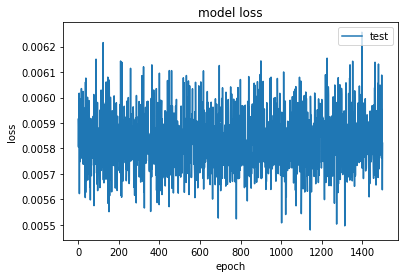

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [32]:
# Using the lesson of Task 2, we will generate Linear regression between model prediction and true data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regr = LinearRegression()
regr.fit(y_test_orig,Predictions)
y_pred = regr.predict(y_test_orig)

print ("coefficients : ",regr.coef_[0][0])   #Slope
print ("Intercept : ",regr.intercept_[0])    #Intercept

print('R_Squared:', r2_score(y_test_orig, y_pred))


coefficients :  1.0027681826788752
Intercept :  -0.3109473692857989
R_Squared: 0.9999525576325605


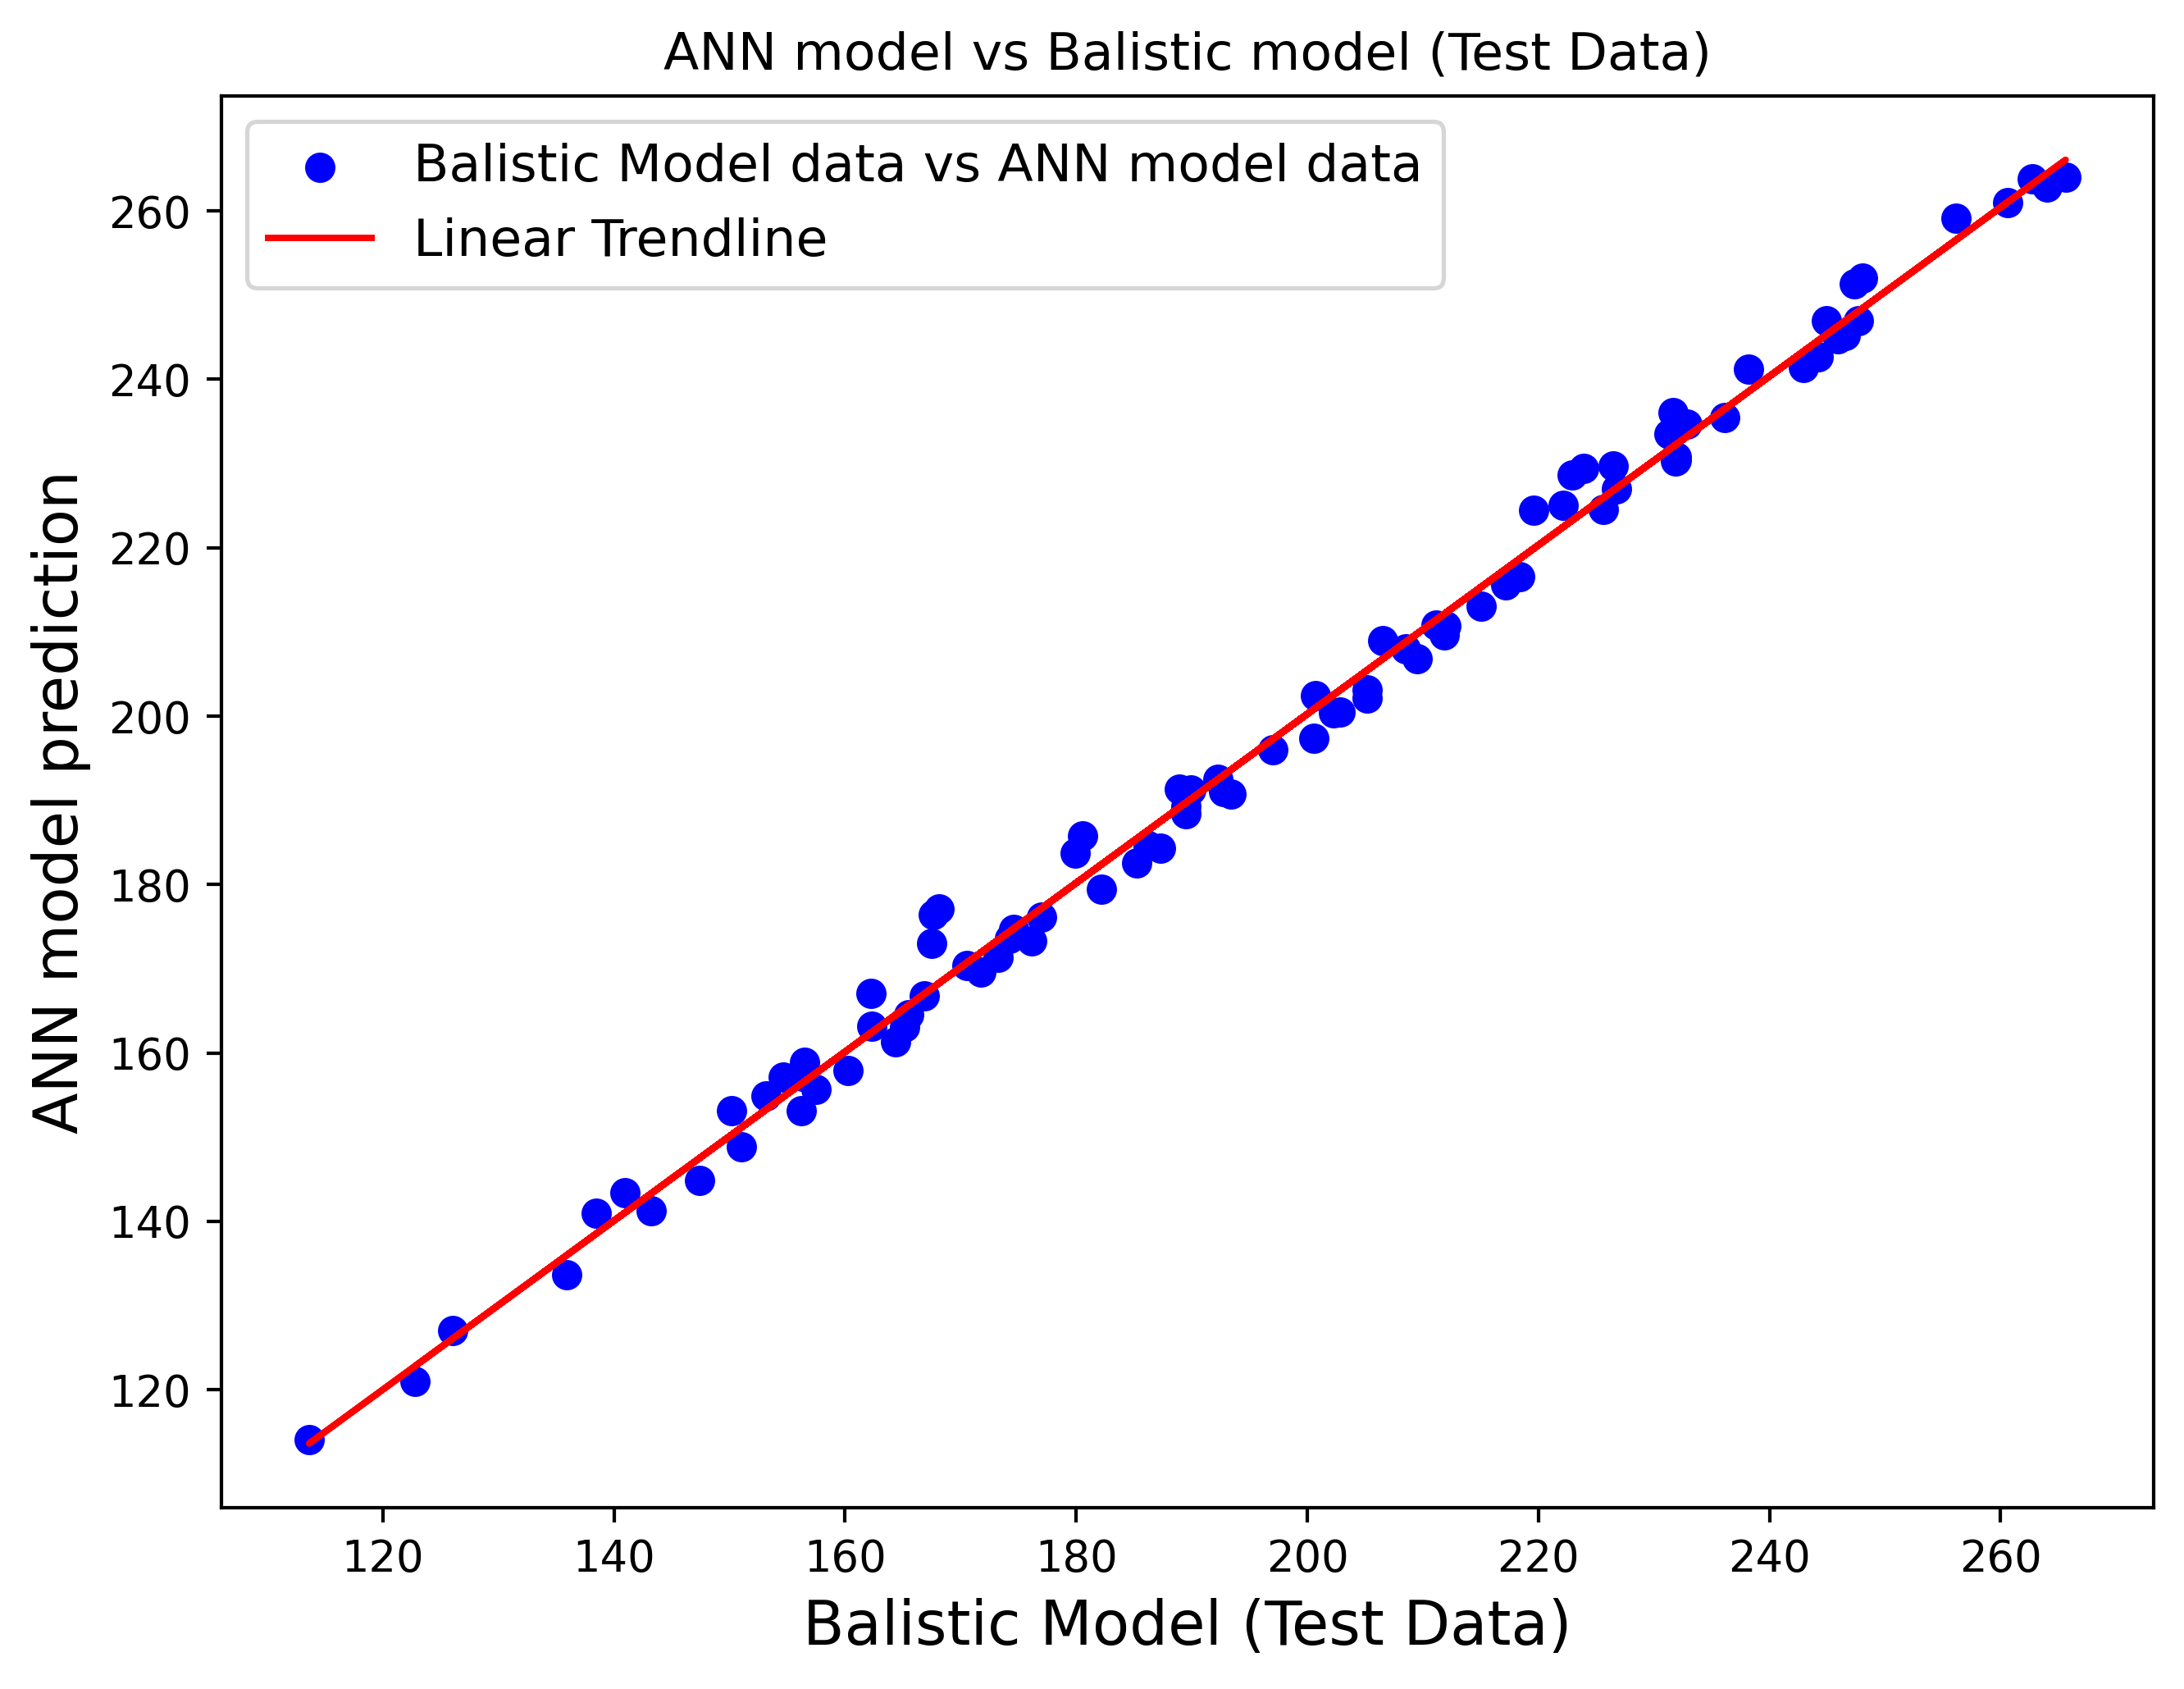

In [33]:
# Here we will plot both the scatter and the line plots

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

# Scatter plot of the true and the prediction obtained from ANN
plt.scatter(y_test_orig, Predictions,color='blue')


# Line plot obtained from the true and predicted from the true using linearRegression

## Result for '' R''
plt.plot(y_test_orig,   regr.coef_[0][0]*y_test_orig  + regr.intercept_[0], '-r')


## Result for ''Time''
#plt.plot(y_test_orig,   1.0077*y_test_orig  -0.0741, '-r')


plt.title('ANN model vs Balistic model (Test Data)')
plt.ylabel('ANN model prediction',fontsize=14)
#plt.xlabel('Measurement(Training Data)',fontsize=14)
plt.xlabel('Balistic Model (Test Data)',fontsize=14)
plt.legend(['Balistic Model data vs ANN model data', 'Linear Trendline'], loc='upper left', fontsize=12)


plt.show()


# Conclusion

    Results show that ANN predict the test dataset with the accuracy of R_Squared: 0.999934923476118

    


# Your task #2

    Change the file from balistic to your cleandedoutlier or filtered one
    
    Then, do the modeling works according to the report hand in-format